# Multiple Linear Regression Example - __THIS USES THE COMPLETIONTIME.CSV FILE__

## Importing Relevant Libraries!

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sy
from scipy import stats  
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from mpl_toolkits.mplot3d import Axes3D

## Completion Time of a Maze
Is completion time of a maze related to brain size, height or weight?

In [10]:
#Read/import the dataset
time=pd.read_csv('CompletionTime.csv')
time

,Completion,Brain,Height,Weight
0,124,81.69,64.5,118
1,150,103.84,73.3,143
2,128,96.54,68.8,172
3,134,95.15,65.0,147
4,110,92.88,69.0,146
5,131,99.13,64.5,138
6,98,85.43,66.0,175
7,84,90.49,66.3,134
8,147,95.55,68.8,172
9,124,83.39,64.5,118


In [11]:
#Pairplot allows us to visualize pairwise relationships between variables in a dataset
#Pairplot takes (dataset, kind = type of chart you want, reg is used for regression,diag_kind is the plot for the diagonal)
#kind can take reg (regression), hist (histogram), scatter (scatterplot)
sns.pairplot(time,kind='reg',diag_kind='hist')

In [12]:
# corr() on the pandas DataFrame of time to determine the correaltions between the variables
correlations=time.corr()
print(correlations)

#Generate a correlation heatmap using the following code. For heatmap it takes (your dataset, annot (annotations), and cmap (the colour mapping))
cmap=sns.color_palette("mako",as_cmap=True)
sns.heatmap(correlations,annot=True,cmap=cmap)

            Completion     Brain    Height    Weight
Completion    1.000000  0.377815 -0.093156  0.002512
Brain         0.377815  1.000000  0.588367  0.513487
Height       -0.093156  0.588367  1.000000  0.699614
Weight        0.002512  0.513487  0.699614  1.000000


<AxesSubplot:>

## Making OLS models for 1 (Brain), 2 (Brain+Height), and 3 (Brain+Height+Weight) factors

In [13]:
#Model for 1 factor

model5CT=ols('Completion~Brain',data=time)
results5CT=model5CT.fit()
print(results5CT.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.119   
Dependent Variable: Completion       AIC:                341.9302
Date:               2023-10-31 16:45 BIC:                345.2054
No. Observations:   38               Log-Likelihood:     -168.97 
Df Model:           1                F-statistic:        5.994   
Df Residuals:       36               Prob (F-statistic): 0.0194  
R-squared:          0.143            Scale:              449.93  
------------------------------------------------------------------
               Coef.   Std.Err.    t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept      4.6519   43.7118  0.1064  0.9158  -83.9997  93.3035
Brain          1.1766    0.4806  2.4484  0.0194    0.2020   2.1513
-----------------------------------------------------------------
Omnibus:              5.134        Durbin-Watson:           1.459
Prob(Omnibus):        

In [6]:
#Model for 2 factors
model5CTA=ols('Completion~Brain+Height',data=time)
results5CTA=model5CTA.fit()
print(results5CTA.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.255   
Dependent Variable: Completion       AIC:                336.5031
Date:               2023-10-31 14:05 BIC:                341.4158
No. Observations:   38               Log-Likelihood:     -165.25 
Df Model:           2                F-statistic:        7.321   
Df Residuals:       35               Prob (F-statistic): 0.00221 
R-squared:          0.295            Scale:              380.62  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025   0.975] 
------------------------------------------------------------------
Intercept   111.2757   55.8673   1.9918  0.0542  -2.1410  224.6924
Brain         2.0606    0.5466   3.7697  0.0006   0.9509    3.1704
Height       -2.7299    0.9932  -2.7487  0.0094  -4.7462   -0.7137
-----------------------------------------------------------------
Omnibus:             

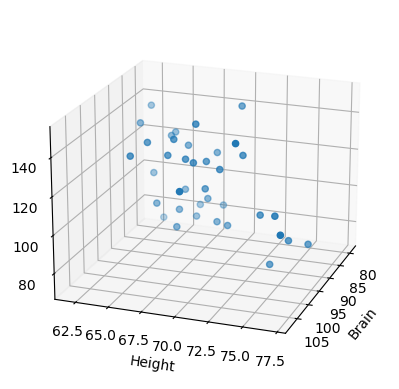

In [10]:
#3D plot putting 2 factors and the dependent variable
#add_subplot (args = defining the positions of the subplot, projection ('3d') makes it a 3d plot
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

x=time['Brain']
y=time['Height']
z=time['Completion']
plt.xlabel("Brain")
plt.ylabel("Height")

ax.scatter(x,y,z)
#view_init sets the elevation and azimuth (for visualizing the angle that you view the chart)
ax.view_init(elev=20.,azim=20)

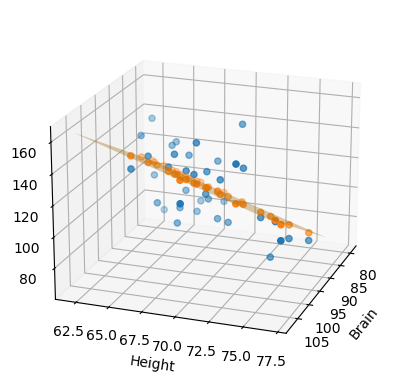

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

x=time['Brain']
y=time['Height']
z=time['Completion']
plt.xlabel("Brain")
plt.ylabel("Height")

ax.scatter(x,y,z)
ax.view_init(elev=20.,azim=20)

ax.scatter(x.values,y.values,results5CTA.fittedvalues.values,label="Fited Values")

x1,y1=model5CTA.exog_names[1:]

x_surf=np.arange(time['Brain'].min(), time['Brain'].max())
y_surf=np.arange(time['Height'].min(), time['Height'].max())
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), y1:yS.ravel()})
zS=results5CTA.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,color='orange')

In [10]:
#Model for 3 factors

model5=ols('Completion~Brain+Height+Weight',data=time)
results5=model5.fit()
print(results5.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.233   
Dependent Variable: Completion       AIC:                338.5030
Date:               2023-10-31 14:00 BIC:                345.0534
No. Observations:   38               Log-Likelihood:     -165.25 
Df Model:           3                F-statistic:        4.741   
Df Residuals:       34               Prob (F-statistic): 0.00722 
R-squared:          0.295            Scale:              391.82  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept  111.3536   62.9711   1.7683  0.0860  -16.6191  239.3263
Brain        2.0604    0.5634   3.6567  0.0009    0.9153    3.2054
Height      -2.7319    1.2294  -2.2221  0.0330   -5.2304   -0.2334
Weight       0.0006    0.1971   0.0028  0.9977   -0.3999    0.4010
--------------------

## Checking for Assumptions of Linear Regression

eval_env: 1


<Figure size 640x480 with 0 Axes>

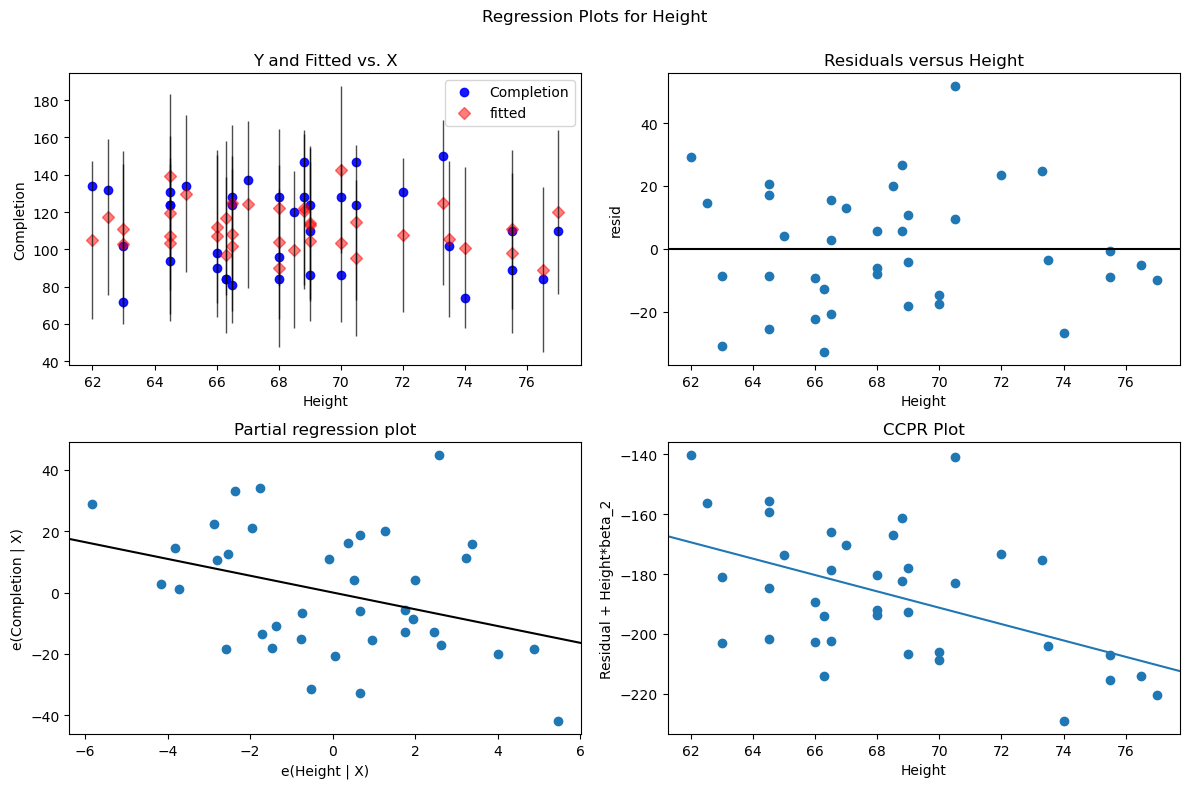

In [18]:
#Plotting the residuals of the 3 factor model to check for assumptions of linear regression

fig=plt.figure()

fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results5,'Height',fig=fig)

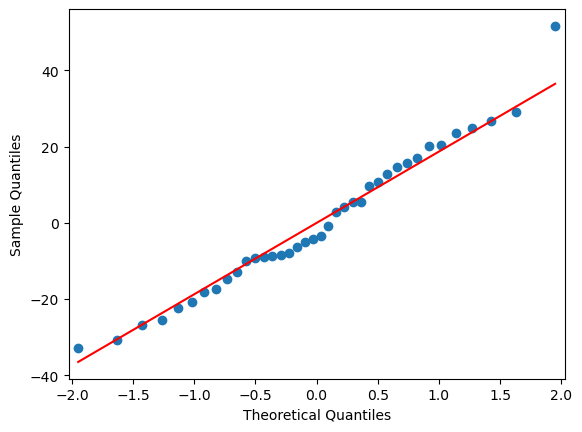

ShapiroResult(statistic=0.9759781360626221, pvalue=0.5758411288261414)

In [20]:
#Checking for normality of residuals

sm.qqplot(results5.resid,line='s')
plt.show()

#Shapiro-wilk test
stats.shapiro(results5.resid)